# Лабораторная работа 3. Морфологические преобразования

Морфологические преобразования

Следует реализовать выделение проблемных зубьев у шестеренки. Пример разобран на лекции.

Описание есть у Стокмана.

Использовать только морфологические операции для бинарных изображений.

Можно использовать для этого функции OpenCV, например:

**Erode** -- размывание(операция сужения)

**Dilate** -- растягивание(операция расширения)

In [37]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Читаем изображение

In [38]:
imageSrs = cv2.imread("1.png")

In [39]:
def showImage(imageArray, size=(20,20)):
    plt.figure(figsize=size)
    plt.imshow(imageArray, interpolation='nearest')
    plt.show()

# B1 = Исходное - hole_ring

In [40]:
def showPointImage(image, width, height, r1, r2, x, y):
    res = image
    circle = cv2.circle(np.zeros((width, height), np.uint8), (x,y), r1, 255, -1)
    mask = cv2.circle(np.zeros((width, height), np.uint8), (x,y), r2, 255, -1) - circle
    res = cv2.erode(res, mask)
    showImage(res)

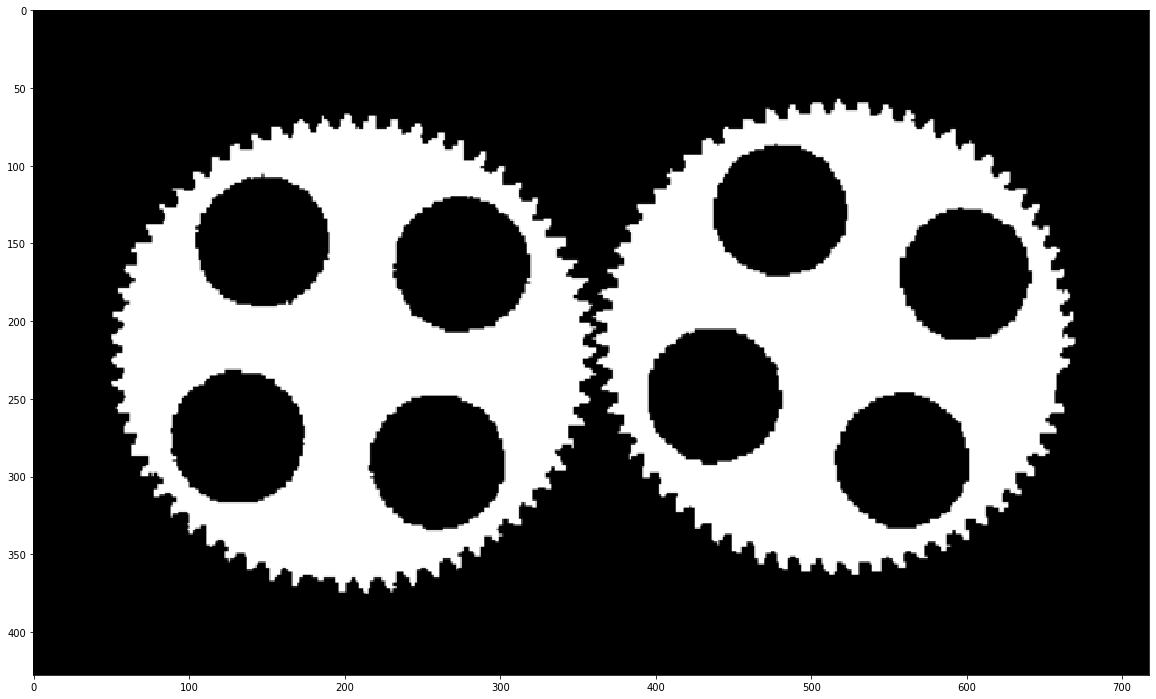

In [41]:
showImage(imageSrs)

In [47]:
def transformCircle(image, sizeCircle, r, R):
    res = imageSrs
    circlePoit = cv2.circle(np.zeros((sizeCircle, sizeCircle), np.uint8), (sizeCircle // 2,sizeCircle // 2), 49, 255, -1)
    maskPint = cv2.circle(np.zeros((sizeCircle, sizeCircle), np.uint8), (sizeCircle // 2,sizeCircle // 2), R, 255, -1) ^ circlePoit
    imageSmallPoint = cv2.erode(res, maskPint)
    showImage(imageSmallPoint)
    
#interact(transformCircle, image=fixed(imageSrs), sizeCircle=(1, 100), r=(49, 50), R=(49, 53))

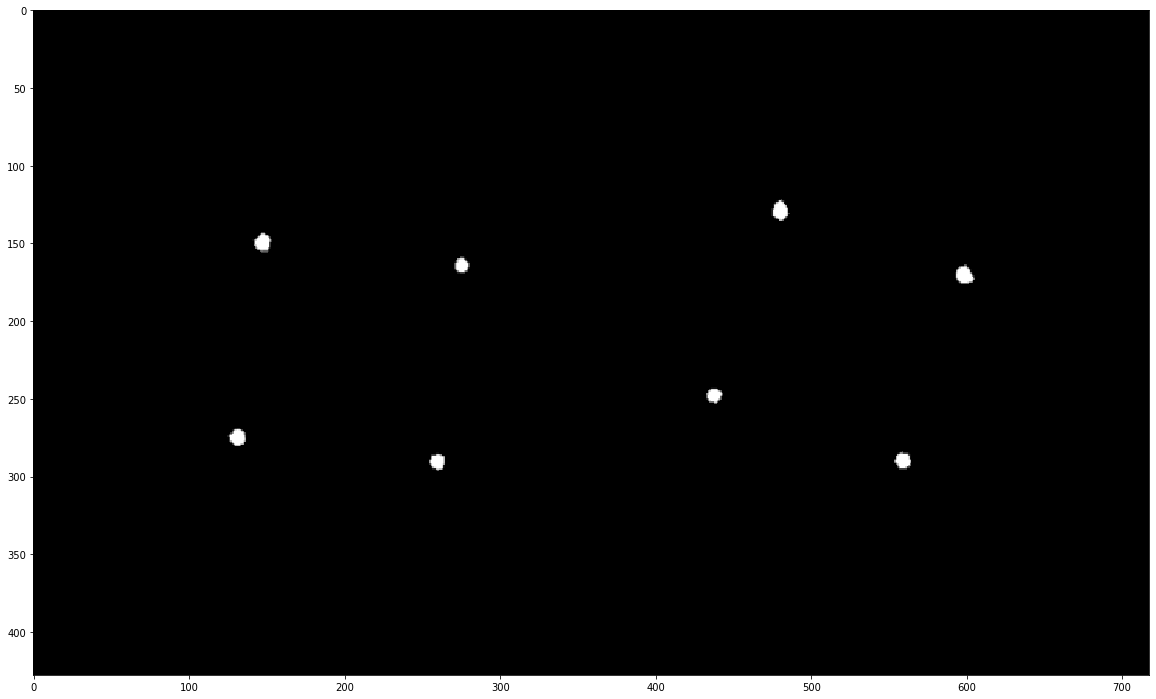

In [52]:
res = imageSrs
circlePoit = cv2.circle(np.zeros((100, 100), np.uint8), (50,50), 49, 255, -1)
maskPint = cv2.circle(np.zeros((100, 100), np.uint8), (50,50), 50, 255, -1) ^ circlePoit
imageSmallPoint = cv2.erode(res, maskPint)
showImage(imageSmallPoint)

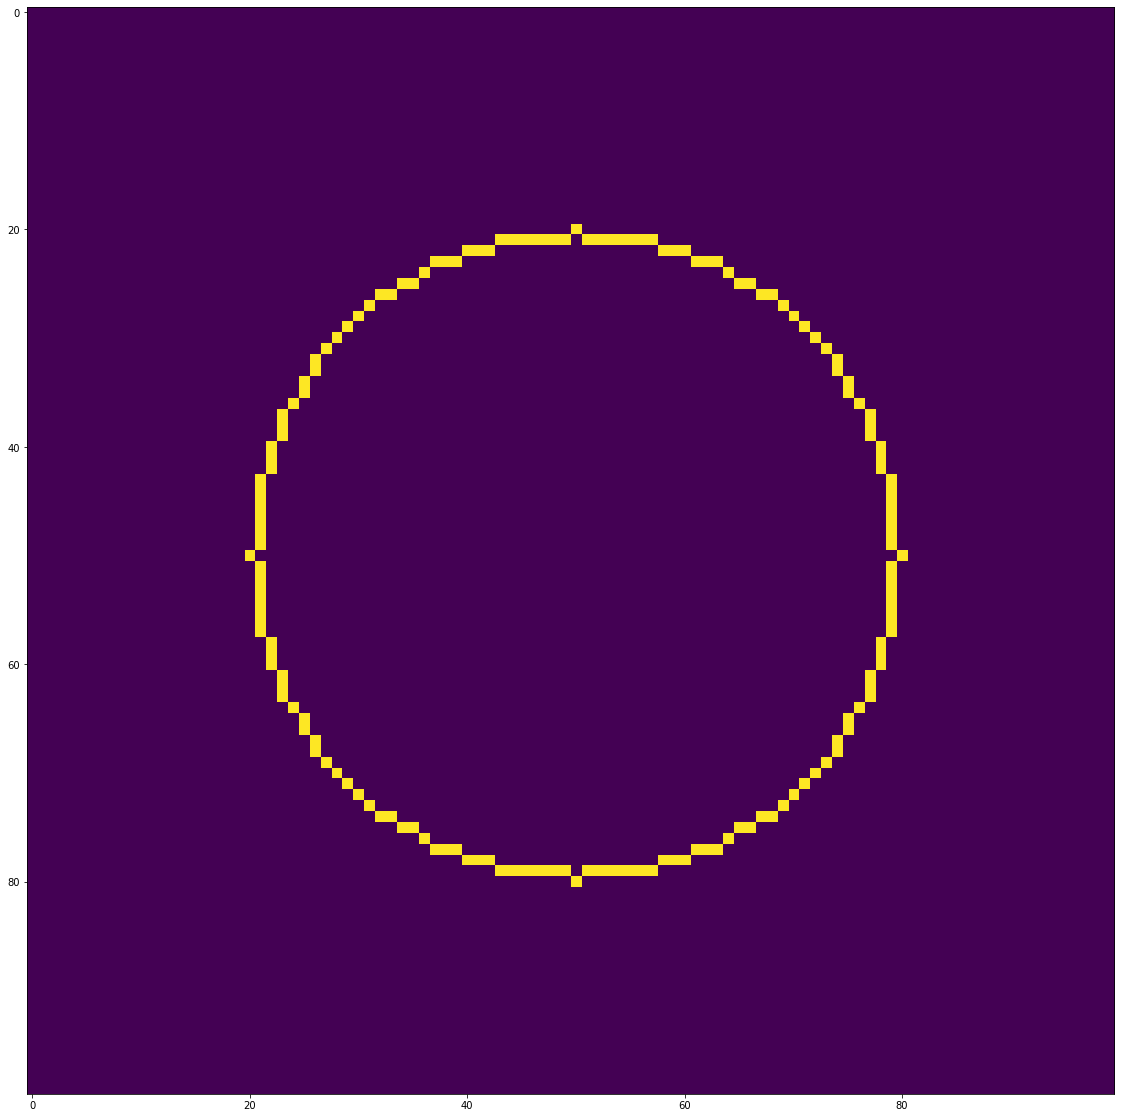

In [55]:
showImage(cv2.circle(np.zeros((100, 100), np.uint8), (50,50), 30, 60))

# B2 = B1 + hole_mask

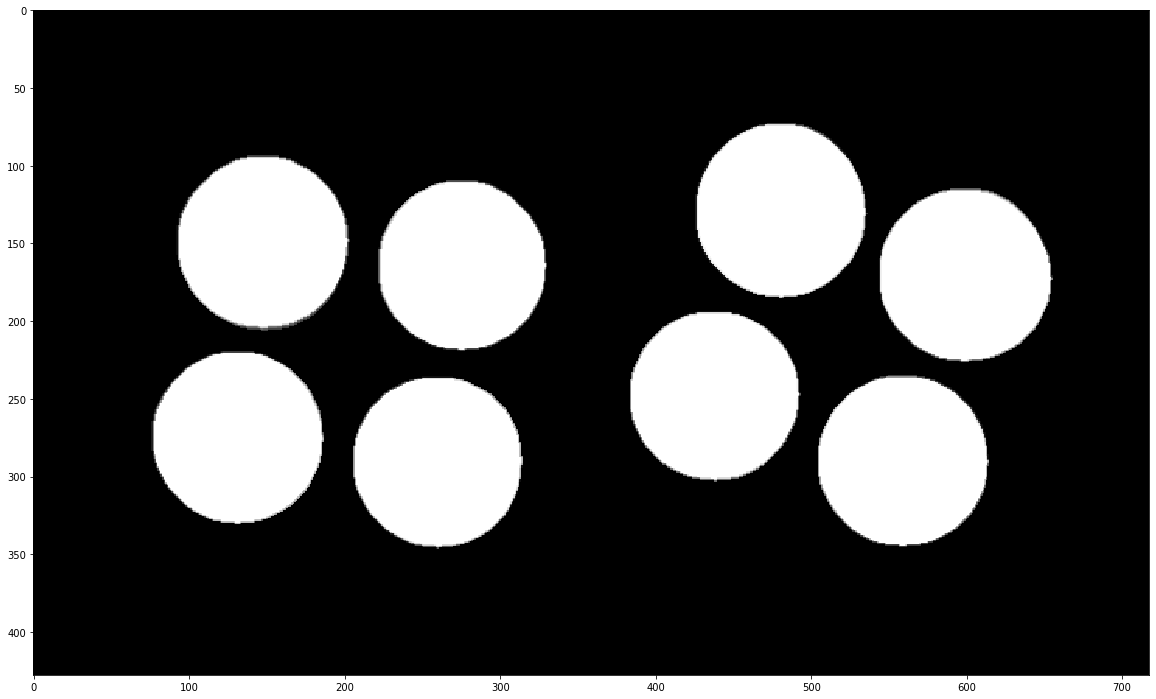

In [13]:
res = imageSmallPoint
circle = cv2.circle(np.zeros((100, 100), np.uint8), (50,50), 50, 255, -1)
imageBigPoint = cv2.dilate(res, circle)
showImage(imageBigPoint)

# B3 = Исходное - B2

# Преобразование изображение(убираем ненужные оттенки)

In [44]:
def getNormalizationImage(image):
    width = image.shape[1]
    height = image.shape[0]
    whiteColor = [255, 255, 255]
    blackColor = [0, 0, 0]
    newImage = image.copy()
    for i in range(height):
        for j in range(width):
            newImage[i, j] = blackColor if image[i, j][0] <= 125 else whiteColor
    return newImage

normalizationImageSrs = getNormalizationImage(imageSrs)

# Объединение двух картинок. B2 и B3

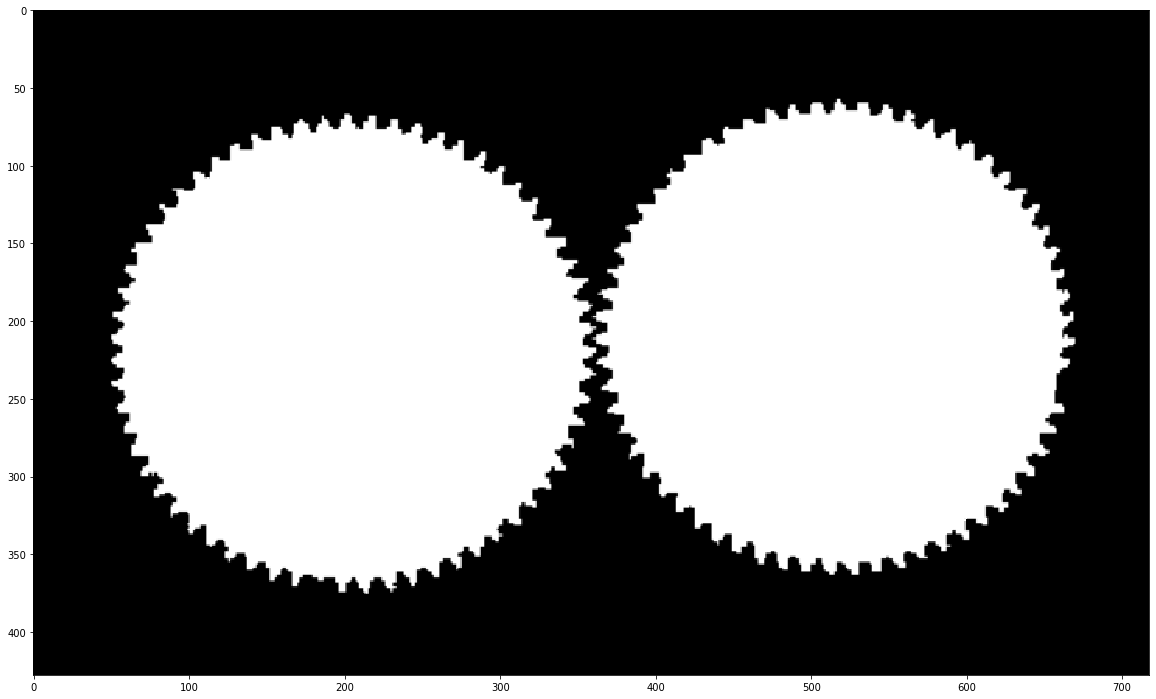

In [45]:
merginPointAndSource = imageSrs | imageBigPoint
showImage(merginPointAndSource)

# Выделение окружности

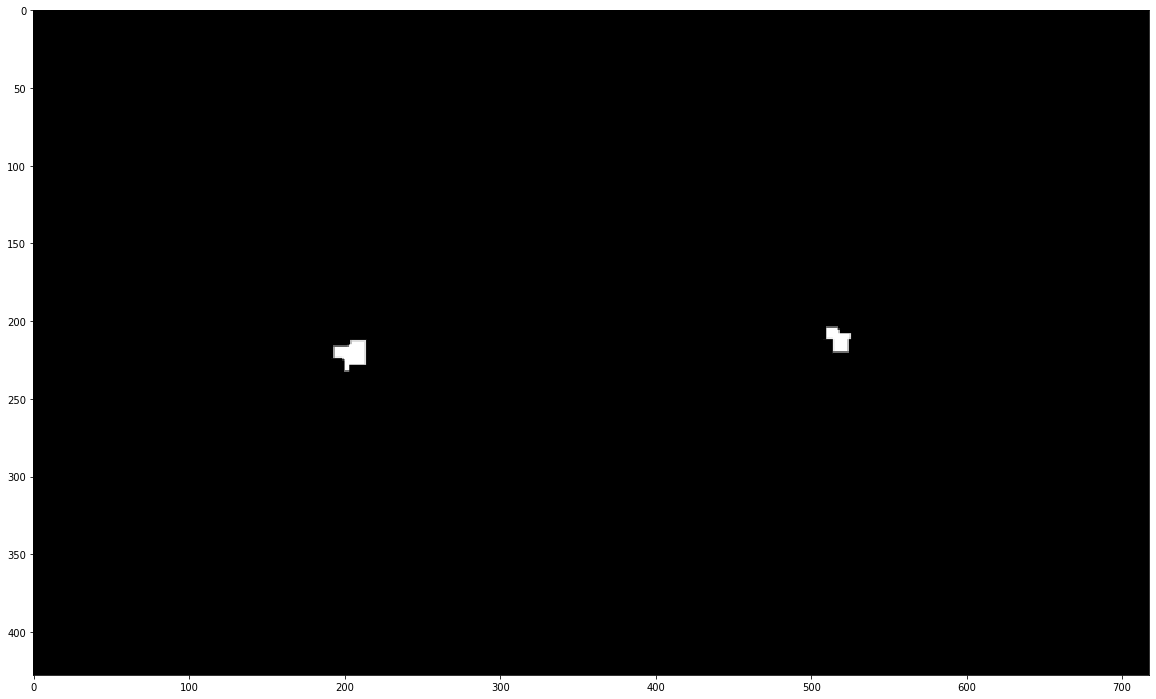

In [25]:
centerCircles = cv2.erode(merginPointAndSource, np.ones((200, 200), np.uint8))
showImage(centerCircles)

# B7 получение колец

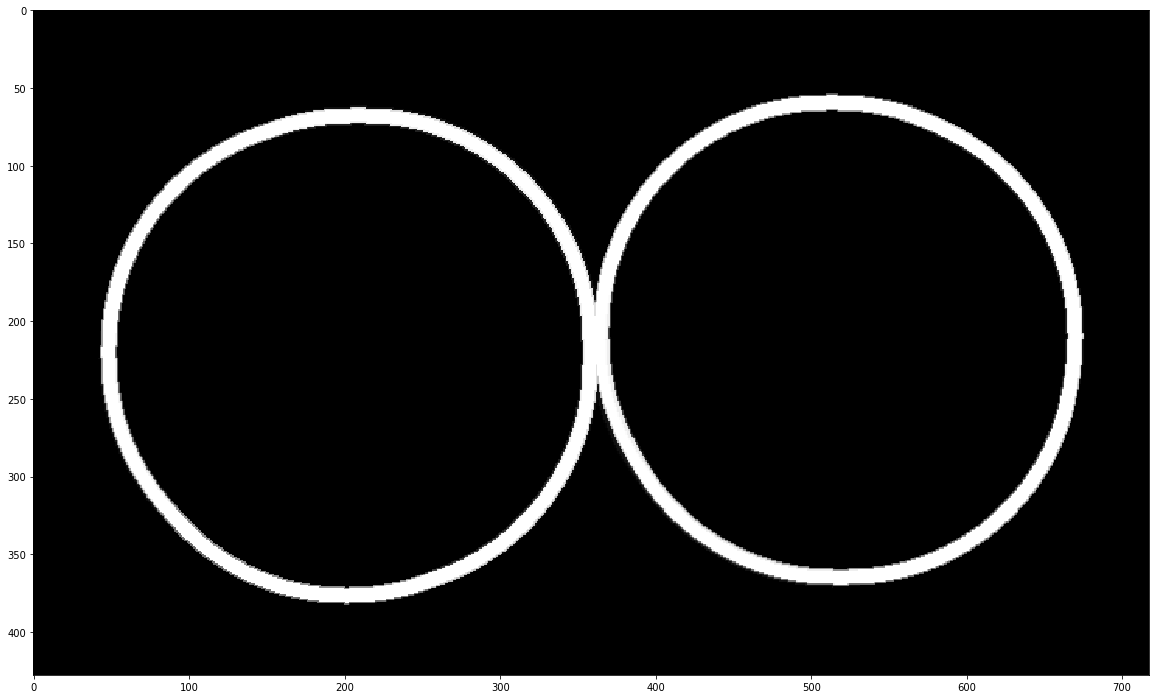

In [26]:
imageBigCircle = cv2.dilate(centerCircles, cv2.circle(np.zeros((500, 500), np.uint8), (250, 250), 150, 255, -1))
imageSmallCircle = cv2.dilate(centerCircles, cv2.circle(np.zeros((500, 500), np.uint8), (250, 250), 140, 255, -1))
imageCircles = imageBigCircle - imageSmallCircle
showImage(imageCircles)

# B8 = Исходное - B7

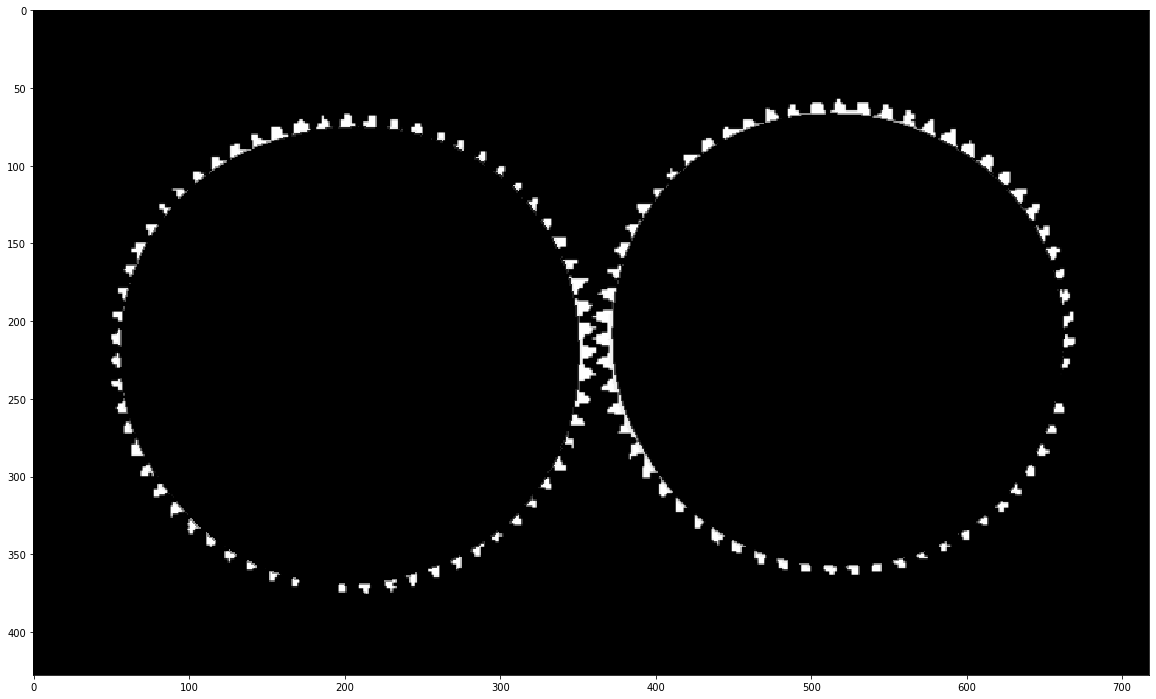

In [31]:
imageBigCircle = cv2.dilate(centerCircles, cv2.circle(np.zeros((500, 500), np.uint8), (250, 250), 150, 255, -1))
imageSmallCircle = cv2.dilate(centerCircles, cv2.circle(np.zeros((500, 500), np.uint8), (250, 250), 138, 255, -1))
imageCircles = imageBigCircle - imageSmallCircle
teethCircles = imageSrs & imageCircles
showImage(teethCircles)

def transformCircle(image, r1, r2):
    res = image
    imageBigCircle = cv2.dilate(centerCircles, cv2.circle(np.zeros((500, 500), np.uint8), (250, 250), r1, 255, -1))
    imageSmallCircle = cv2.dilate(centerCircles, cv2.circle(np.zeros((500, 500), np.uint8), (250, 250), r2, 255, -1))
    imageCircles = imageBigCircle - imageSmallCircle
    teethCircles = imageSrs & imageCircles
    showImage(teethCircles)
maxValue = 500
#interact(transformCircle, image=fixed(centerCircles), r1=(1, 320), r2=(1, 200))

# B9 = B8 + дилатация кругом

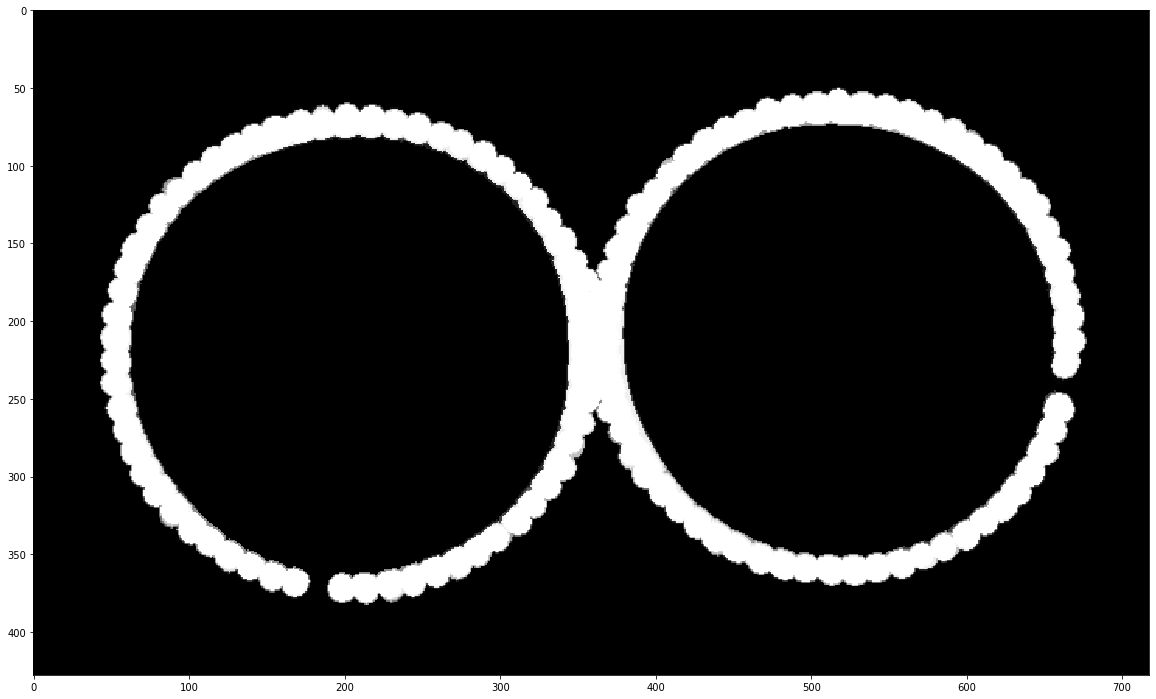

In [33]:
res = teethCircles
circle = cv2.circle(np.zeros((80, 80), np.uint8), (40, 40), 7, 255, -1)
ringsWithGap = cv2.dilate(res, circle)
showImage(ringsWithGap)

def transformCircle(image, widthR, r):
    res = image
    circle = cv2.circle(np.zeros((widthR, widthR), np.uint8), (widthR // 2, widthR // 2), r, 255, -1)
    res = cv2.dilate(res, circle)
    showImage(res)
maxValue = 500
#interact(transformCircle, image=fixed(teethCircles), widthR=(1, 320), r=(1, 50))

# Нахождение дефектных точек

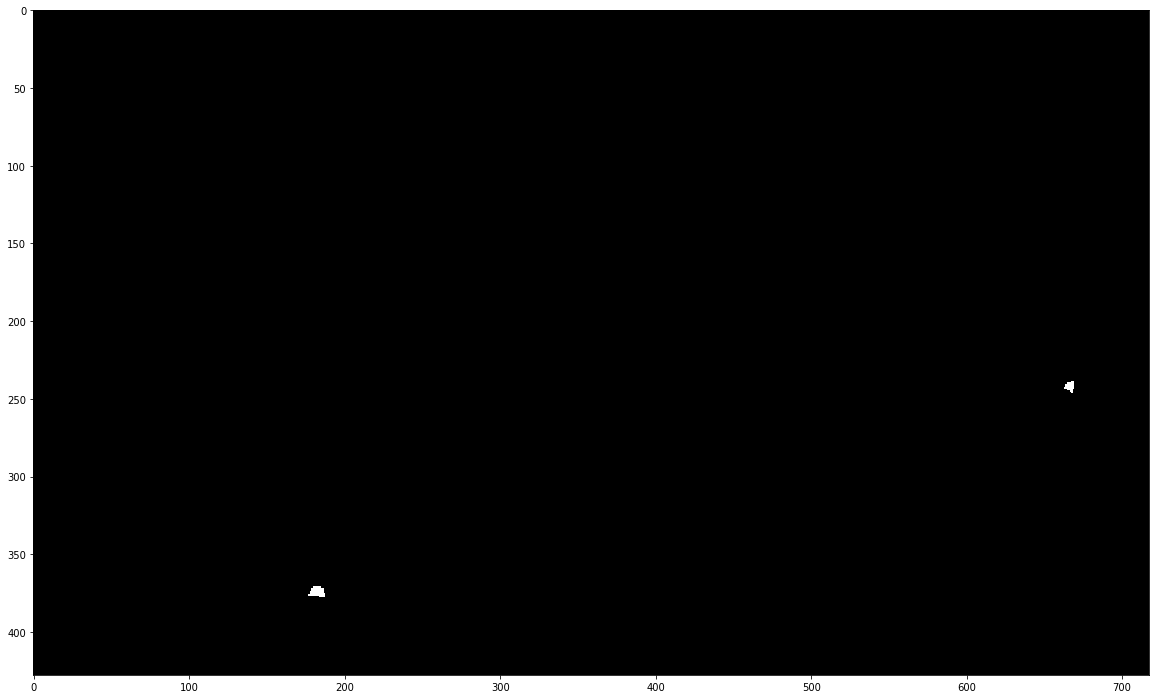

In [35]:
res = imageCircles - ringsWithGap
circle = cv2.circle(np.zeros((160, 160), np.uint8), (80, 80), 3, 255, -1)
placeGap = cv2.erode(res, circle)
placeGap = getNormalizationImage(placeGap)
showImage(placeGap)

In [36]:
def transformCircle(image, widthR, r):
    res = image
    circle = cv2.circle(np.zeros((widthR, widthR), np.uint8), (widthR // 2, widthR // 2), r, 255, -1)
    res = cv2.dilate(res, circle)
    res = ringsWithGap | res
    showImage(res)
maxValue = 500
interact(transformCircle, image=fixed(placeGap), widthR=(1, 320), r=(1, 50))

interactive(children=(IntSlider(value=160, description='widthR', max=320, min=1), IntSlider(value=25, descript…

<function __main__.transformCircle(image, widthR, r)>